# Análise da Satisfação do Cliente do E-commerce Olist 

No desenvolvimento deste trabalho, foi aplicada uma combinação de técnicas de Processamento de Linguagem Natural (NLP) e Machine Learning para prever a satisfação dos clientes da Olist. A análise foi baseada em dados de transações, incluindo as avaliações dos clientes, que fornecem informações valiosas sobre a experiência de compra. A partir dessas resenhas, foi possível extrair sentimentos e opiniões dos consumidores, utilizando abordagens de NLP para transformar os textos não estruturados em variáveis que poderiam ser analisadas de forma quantitativa.

* **Pré-processamento de Texto:** Realização de uma limpeza detalhada e preparação do conteúdo das avaliações para técnicas de NLP e aprendizado de máquina, incluindo a geração de nuvens de palavras e análise de tópicos. 
* **Análise de Sentimentos:** Aplicação do LeIA para classificar sentimentos em português, permitindo a identificação de aspectos positivos e negativos nas avaliações dos clientes.
* **Machine Learning:** Utilização de modelos variados para classificar os sentimentos expressos nas avaliações e prever futuras tendências, contribuindo para a melhoria da experiência do cliente pelas empresas.

## Descrição da empresa e seu problema

- A maioria dos clientes não deixa avaliações ou comentários após realizar uma compra.
- Essa ausência de feedback dificulta a avaliação da qualidade do produto e da experiência do cliente.
- Produtos com avaliações negativas podem prejudicar a reputação da plataforma.
- Itens com poucas avaliações não devem ser descartados imediatamente, pois clientes satisfeitos muitas vezes não registram suas opiniões.midor.

## 0. Importações

### 0.1 Bibliotecas 

In [1]:
!pip install leia-br

In [2]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import warnings
%matplotlib inline

# Definir a paleta de cores para o Seaborn
colors = ['#001C5B', '#E64E36', '#ff82cd', '#0A4EE4', '#779E3D', '#f0a028']
sns.set_palette(colors)

# Bibliotecas para processamento de texto
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from nltk import ngrams

# Análise de Sentimentos
from LeIA import SentimentIntensityAnalyzer

# Baixar dados necessários do NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Bibliotecas para aprendizado de máquina
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (GradientBoostingClassifier, RandomForestClassifier)

# Métricas de avaliação
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, 
    confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, auc)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rubeus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rubeus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
### Ignoring warnings
warnings.filterwarnings('ignore')

### Pandas Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

### 0.2 Carregando os dados 

In [4]:
# Carrega os datasets
order_items = pd.read_csv("https://media.githubusercontent.com/media/mavimelato/tcc_olist/refs/heads/master/data/olist_order_items_dataset.csv?raw=true")
orders = pd.read_csv("https://media.githubusercontent.com/media/mavimelato/tcc_olist/refs/heads/master/data/olist_orders_dataset.csv?raw=true")
payments = pd.read_csv("https://media.githubusercontent.com/media/mavimelato/tcc_olist/refs/heads/master/data/olist_order_payments_dataset.csv?raw=true")
products = pd.read_csv("https://media.githubusercontent.com/media/mavimelato/tcc_olist/refs/heads/master/data/olist_products_dataset.csv?raw=true")
customers = pd.read_csv("https://media.githubusercontent.com/media/mavimelato/tcc_olist/refs/heads/master/data/olist_customers_dataset.csv?raw=true")
sellers = pd.read_csv("https://media.githubusercontent.com/media/mavimelato/tcc_olist/refs/heads/master/data/olist_sellers_dataset.csv?raw=true")
product_category = pd.read_csv("https://media.githubusercontent.com/media/mavimelato/tcc_olist/refs/heads/master/data/product_category_name_translation.csv?raw=true")
geolocation = pd.read_csv("https://media.githubusercontent.com/media/mavimelato/tcc_olist/refs/heads/master/data/olist_geolocation_dataset.csv?raw=true")
reviews = pd.read_csv("https://media.githubusercontent.com/media/mavimelato/tcc_olist/refs/heads/master/data/olist_order_reviews_dataset.csv?raw=true")

# Juntando os dados principais do pedido
df = order_items.merge(orders, on='order_id') \
                .merge(payments, on='order_id') \
                .merge(products, on='product_id') \
                .merge(customers, on='customer_id') \
                .merge(sellers, on='seller_id') \
                .merge(product_category, on='product_category_name') \
                .merge(reviews, on='order_id', how='inner')

## 1. Descrição dos dados

In [5]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900,13.290,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1,credit_card,2,72.190,cool_stuff,58.000,598.000,4.000,650.000,28.000,9.000,14.000,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.900,19.930,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1,credit_card,3,259.830,pet_shop,56.000,239.000,2.000,30000.000,50.000,30.000,40.000,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,pet_shop,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.000,17.870,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1,credit_card,5,216.870,moveis_decoracao,59.000,695.000,2.000,3050.000,33.000,13.000,33.000,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,furniture_decor,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.990,12.790,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1,credit_card,2,25.780,perfumaria,42.000,480.000,1.000,200.000,16.000,10.000,15.000,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP,perfumery,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.900,18.140,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1,credit_card,3,218.040,ferramentas_jardim,59.000,409.000,1.000,3750.000,35.000,40.000,30.000,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR,garden_tools,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [6]:
df.shape

(115609, 40)

### 1.2 Tipo dos dados

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   order_item_id                  115609 non-null  int64  
 2   product_id                     115609 non-null  object 
 3   seller_id                      115609 non-null  object 
 4   shipping_limit_date            115609 non-null  object 
 5   price                          115609 non-null  float64
 6   freight_value                  115609 non-null  float64
 7   customer_id                    115609 non-null  object 
 8   order_status                   115609 non-null  object 
 9   order_purchase_timestamp       115609 non-null  object 
 10  order_approved_at              115595 non-null  object 
 11  order_delivered_carrier_date   114414 non-null  object 
 12  order_delivered_customer_date 

### 1.3 Colunas da base de dados (df)

| Nome da Coluna                   | Descrição                                                                                      |
|----------------------------------|------------------------------------------------------------------------------------------------|
| order_id                         | Identificador único do pedido.                                                                 |
| customer_id                      | Chave para o conjunto de dados dos clientes. Cada pedido tem um customer_id único.            |
| order_status                     | Referência ao status do pedido (entregue, enviado, etc).                                        |
| order_purchase_timestamp         | Mostra o momento da compra.                                                                    |
| order_approved_at                | Mostra o momento da aprovação do pagamento.                                                    |
| order_delivered_carrier_date     | Mostra a data em que o pedido foi encaminhado ao parceiro logístico.                          |
| order_delivered_customer_date    | Mostra a data de entrega real do pedido ao cliente.                                            |
| order_estimated_delivery_date    | Mostra a data de entrega estimada que foi informada ao cliente no momento da compra.           |
| customer_unique_id               | Identificador único de um cliente.                                                             |
| customer_zip_code_prefix         | Os primeiros cinco dígitos do CEP do cliente.                                                  |
| customer_city                    | Nome da cidade do cliente.                                                                     |
| customer_state                   | Estado do cliente.                                                                             |
| order_item_id                    | Número sequencial que identifica o número de itens incluídos no mesmo pedido.                   |
| product_id                       | Identificador único do produto.                                                                |
| seller_id                        | Identificador único do vendedor.                                                               |
| shipping_limit_date              | Mostra a data limite de envio do vendedor para entregar o pedido ao parceiro logístico.        |
| price                            | Preço do item.                                                                                 |
| freight_value                    | Valor do frete do item (se um pedido tiver mais de um item, o valor do frete é dividido).      |
| payment_sequential               | Um cliente pode pagar um pedido com mais de um método de pagamento.                            |
| payment_type                     | Método de pagamento escolhido pelo cliente.                                                     |
| payment_installments             | Número de parcelas escolhidas pelo cliente.                                                     |
| payment_value                    | Valor da transação.                                                                           |
| product_category_name            | Categoria raiz do produto, em português.                                                        |
| product_name_lenght              | Número de caracteres extraídos do nome do produto.                                              |
| product_description_lenght       | Número de caracteres extraídos da descrição do produto.                                         |
| product_photos_qty               | Número de fotos publicadas do produto.                                                          |
| product_weight_g                 | Peso do produto medido em gramas.                                                              |
| product_length_cm                | Comprimento do produto medido em centímetros.                                                   |
| product_height_cm                | Altura do produto medida em centímetros.                                                        |
| product_width_cm                 | Largura do produto medida em centímetros.                                                       |
| seller_zip_code_prefix           | Os primeiros 5 dígitos do CEP do vendedor.                                                      |
| seller_city                      | Nome da cidade do vendedor.                                                                    |
| seller_state                     | Estado do vendedor.                                                                            |
| product_category_name_english    | Nome da categoria em inglês.                                                                   |
| review_id                        | Identificador único da avaliação.                                                               |
| review_score                     | Nota variando de 1 a 5 dada pelo cliente em uma pesquisa de satisfação.                          |
| review_comment_title            | Título do comentário da avaliação deixada pelo cliente, em português.                          |
| review_comment_message          | Mensagem do comentário da avaliação deixada pelo cliente, em português.                        |
| review_creation_date            | Mostra a data em que a pesquisa de satisfação foi enviada ao cliente.                          |
| review_answer_timestamp         | Mostra o momento em que a pesquisa de satisfação foi respondida.                               |

### 1.4 Descrevendo os dados 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,115609.000,1.195,0.686,1.000,1.000,1.000,1.000,21.000
price,115609.000,120.620,182.653,0.850,39.900,74.900,134.900,6735.000
freight_value,115609.000,20.057,15.836,0.000,13.080,16.320,21.210,409.680
payment_sequential,115609.000,1.094,0.730,1.000,1.000,1.000,1.000,29.000
payment_installments,115609.000,2.946,2.781,0.000,1.000,2.000,4.000,24.000
payment_value,115609.000,172.387,265.874,0.000,60.870,108.050,189.480,13664.080
product_name_lenght,115609.000,48.767,10.034,5.000,42.000,52.000,57.000,76.000
product_description_lenght,115609.000,785.808,652.419,4.000,346.000,600.000,983.000,3992.000
product_photos_qty,115609.000,2.205,1.718,1.000,1.000,1.000,3.000,20.000
product_weight_g,115608.000,2113.908,3781.755,0.000,300.000,700.000,1800.000,40425.000


## 2. Pre-processamento e limpeza dos dados 

In [9]:
df.isna().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      1
product_length_cm                     1
product_height_cm                     1


In [10]:
# Certifique-se de que os timestamps estão no formato datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Crie features úteis a partir de order_purchase_timestamp
df['day_of_week_int'] = df['order_purchase_timestamp'].dt.weekday + 1  # Dia da semana como inteiro (1 = segunda-feira, etc.)
df['hour'] = df['order_purchase_timestamp'].dt.hour                    # Hora do dia
df['month'] = df['order_purchase_timestamp'].dt.month                  # Mês como inteiro
df['year'] = df['order_purchase_timestamp'].dt.year                    # Ano como inteiro
df['date'] = df['order_purchase_timestamp'].dt.to_period('M')          # Período mensal para análise de séries temporais

# Calcule o tempo de entrega em dias
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

In [11]:
# Renomeando a coluna para corrigir o erro de ortografia
df.rename(columns={'product_name_lenght': 'product_name_length'}, inplace=True)

### Correlação das Features 

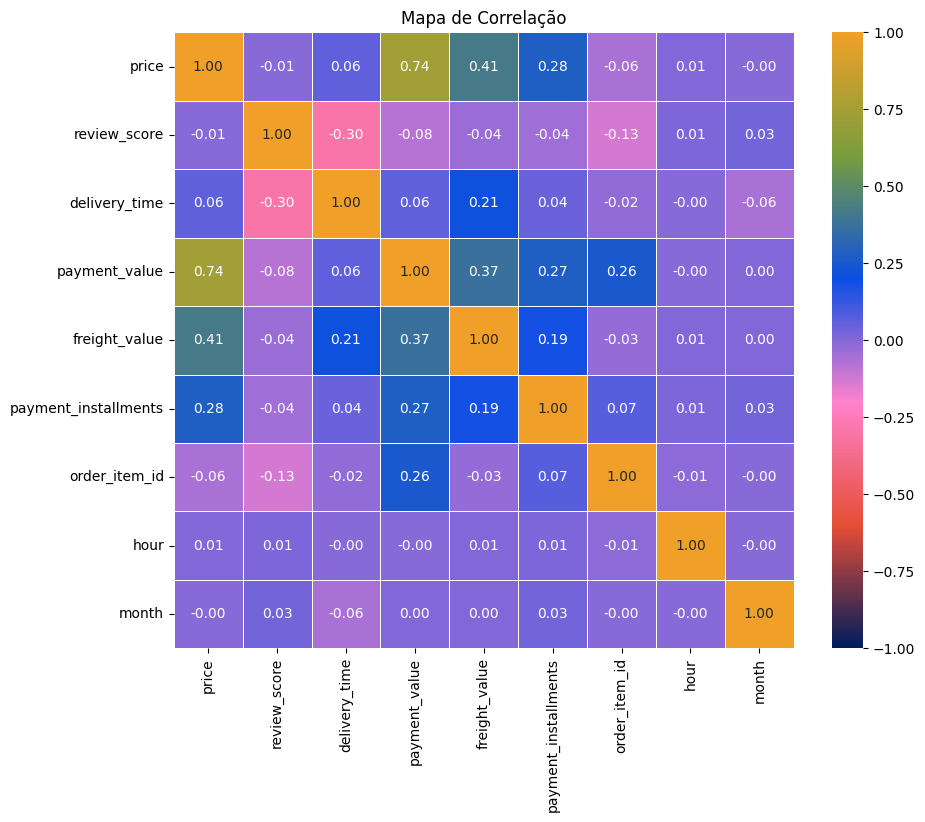

In [12]:
# Seleciona as variáveis relevantes para a análise de correlação
correlation_features = df[['price', 'review_score', 'delivery_time', 
                            'payment_value', 'freight_value', 
                            'payment_installments', 'order_item_id', 
                            'hour', 'month']]

# Calcula a matriz de correlação
correlation = correlation_features.corr()

# Define o mapa de cores personalizado
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap=custom_cmap, vmin=-1, vmax=1, fmt=".2f", linewidths=.5)
plt.title('Mapa de Correlação')
plt.show()

## 3. Processamento DE Linguagem Natural (NLP)

### 3.1 Nuvem de Palavras dos Comentários de Avaliação

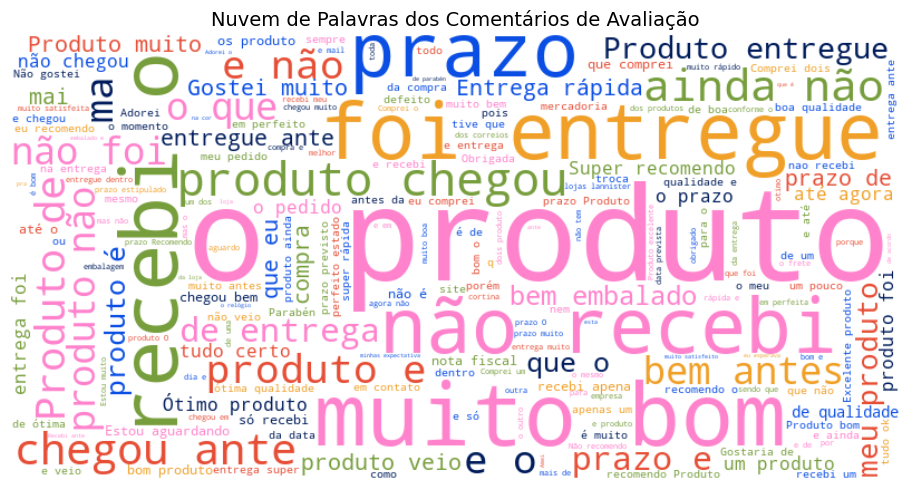

In [13]:
# Define a color function
def color_func(word, font_size, position, orientation, random_state=42, **kwargs):
    return random.choice(colors)

plt.figure(figsize=(10, 5))

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(' '.join(df['review_comment_message'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Nuvem de Palavras dos Comentários de Avaliação', fontsize=14, fontweight='normal')

plt.tight_layout()
plt.show()

### 3.2 Seleção e análise das colunas relevantes para análise de texto

In [14]:
# Selecionando apenas as colunas necessárias para a análise de NLP
nlp_df = df[['review_comment_title', 'review_comment_message', 'product_category_name']]

In [15]:
nlp_df

,review_comment_title,review_comment_message,product_category_name
0,NaN,"Perfeito, produto entregue antes do combinado.",cool_stuff
1,NaN,NaN,pet_shop
2,NaN,Chegou antes do prazo previsto e o produto sur...,moveis_decoracao
3,NaN,NaN,perfumaria
4,NaN,Gostei pois veio no prazo determinado .,ferramentas_jardim
...,...,...,...
115604,NaN,NaN,utilidades_domesticas
115605,NaN,NaN,informatica_acessorios
115606,NaN,NaN,esporte_lazer
115607,NaN,Recebi o produto antes do prazo e corretamente.,informatica_acessorios


In [16]:
nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   review_comment_title    13801 non-null   object
 1   review_comment_message  48906 non-null   object
 2   product_category_name   115609 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


In [17]:
print("Existem {} categorias de produtos no conjunto de dados.".format(nlp_df.product_category_name.nunique()))

Existem 71 categorias de produtos no conjunto de dados.


### 3.3 Limpeza e Pré-processamento dos Comentários de Avaliação

In [18]:
# Calculando o número total de valores NaN em cada coluna do DataFrame 'nlp_df'
nan_counts = nlp_df.isna().sum()
nan_counts

review_comment_title      101808
review_comment_message     66703
product_category_name          0
dtype: int64

In [19]:
# Calculando o número total de valores NaN na coluna 'review_comment_message' do 'nlp_df'
nan_count_review_comment_message = nlp_df['review_comment_message'].isna().sum()
nan_count_review_comment_message

np.int64(66703)

In [20]:
def remove_duplicates_nlp_df(nlp_df, column_name='review_comment_message'):
    
    # Remove duplicatas com base na coluna especificada, mantendo a primeira ocorrência
    nlp_df = nlp_df.drop_duplicates(subset=[column_name], keep='first').reset_index(drop=True)
    
    # Exibe o total de entradas após remover duplicatas
    print(f"Total de entradas após remover duplicatas em '{column_name}': {nlp_df.shape[0]}")
    
    return nlp_df

# Remove duplicatas do 'nlp_df' com base na coluna 'review_comment_message'
nlp_df = remove_duplicates_nlp_df(nlp_df, 'review_comment_message')

# Exibe os primeiros registros para verificar
nlp_df.head()

Total de entradas após remover duplicatas em 'review_comment_message': 35177


,review_comment_title,review_comment_message,product_category_name
0,NaN,"Perfeito, produto entregue antes do combinado.",cool_stuff
1,NaN,NaN,pet_shop
2,NaN,Chegou antes do prazo previsto e o produto sur...,moveis_decoracao
3,NaN,Gostei pois veio no prazo determinado .,ferramentas_jardim
4,NaN,Na descrição do produto quando fui efetuar a c...,beleza_saude


In [21]:
def clean_reviews(df):
    
    # Remove as linhas onde 'review_comment_message' está vazio
    df = df.dropna(subset=['review_comment_message', 'review_comment_title', 'product_category_name']).reset_index(drop=True)

    # Remove as linhas duplicadas
    df = df.drop_duplicates(subset=['review_comment_message'])

    return df

# Supondo que 'nlp_df' seja o seu dataframe
df_cleaned = clean_reviews(nlp_df)

# Exibe os primeiros registros para verificar
df_cleaned.head()

,review_comment_title,review_comment_message,product_category_name
0,Boa,Excelente serviço de compras on line.,cama_mesa_banho
1,produto não entregue,Mudo minha opinião assim que receber o produto...,perfumaria
2,Super Recomendo,"Produto entregue adequadamente e muito rápido,...",alimentos
3,Pessima,O produto chegou e estragou sozinho,beleza_saude
4,Recomendo,Produto como descrito. Mas não gostei pq o som...,audio


### 3.4 Limpeza e Tokenização de Comentários de Avaliação

In [22]:
# Define palavras de parada em português
STOP_WORDS = set(stopwords.words('portuguese'))

# Função auxiliar para limpar e tokenizar o texto
def clean_and_tokenize(text):
    # Garante que o texto seja uma string
    if not isinstance(text, str):
        return "", []
    
    # Converte para minúsculas, remove pontuação e divide em palavras
    cleaned_text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = cleaned_text.split()
    
    # Remove as palavras de parada e cria os tokens
    filtered_words = [word for word in words if word not in STOP_WORDS]
    return " ".join(filtered_words), filtered_words

# Função principal para pré-processar e limpar o dataframe
def preprocess_nlp_df(df):
    # Limpa, remove palavras de parada e tokeniza os comentários
    df[['review_comment_message_clean', 'review_comment_message_tokens']] = df['review_comment_message'].apply(
        lambda text: pd.Series(clean_and_tokenize(text))
    )
    
    # Remove as linhas com valores NaN nas colunas-chave
    df.dropna(subset=['review_comment_title', 'review_comment_message'], inplace=True)
    
    # Remove as linhas duplicadas com base nas colunas 'review_comment_message' e 'review_comment_title'
    df.drop_duplicates(subset=['review_comment_message', 'review_comment_title'], inplace=True)
    
    return df.reset_index(drop=True)

# Pré-processa o dataset 
nlp_df = preprocess_nlp_df(nlp_df)

# Exibe os primeiros registros para verificar
nlp_df[['review_comment_message', 'review_comment_message_clean', 'review_comment_message_tokens']].head()

,review_comment_message,review_comment_message_clean,review_comment_message_tokens
0,Excelente serviço de compras on line.,excelente serviço compras on line,"[excelente, serviço, compras, on, line]"
1,Mudo minha opinião assim que receber o produto...,mudo opinião assim receber produto consta site...,"[mudo, opinião, assim, receber, produto, const..."
2,"Produto entregue adequadamente e muito rápido,...",produto entregue adequadamente rápido gostei s...,"[produto, entregue, adequadamente, rápido, gos..."
3,O produto chegou e estragou sozinho,produto chegou estragou sozinho,"[produto, chegou, estragou, sozinho]"
4,Produto como descrito. Mas não gostei pq o som...,produto descrito gostei pq som alarme baixo,"[produto, descrito, gostei, pq, som, alarme, b..."


### 3.5 Análise de Sentimentos com a biblioteca LeIA 

In [23]:
# Inicializa o Analisador de Sentimentos uma vez
analyzer = SentimentIntensityAnalyzer()

def classify_sentiment(df, column_name='review_comment_message_clean'):
    # Função vetorizada para obter a classificação de sentimento
    def get_sentiment_classification(text):
        scores = analyzer.polarity_scores(text)
        if scores['compound'] >= 0.05:
            return 'Positivo'
        elif scores['compound'] <= -0.05:
            return 'Negativo'
        else:
            return 'Neutro'
    
    # Aplica a análise de sentimentos usando map para uma iteração mais rápida
    df[f'{column_name}_sentiment'] = df[column_name].map(get_sentiment_classification)
    return df

# Classifica o sentimento em 'nlp_df' com base na coluna 'review_comment_message_clean'
nlp_df = classify_sentiment(nlp_df, 'review_comment_message_clean')

# Exibe os resultados de sentimento
nlp_df[['review_comment_message_clean', 'review_comment_message_clean_sentiment']].head(25)

,review_comment_message_clean,review_comment_message_clean_sentiment
0,excelente serviço compras on line,Positivo
1,mudo opinião assim receber produto consta site...,Neutro
2,produto entregue adequadamente rápido gostei s...,Positivo
3,produto chegou estragou sozinho,Negativo
4,produto descrito gostei pq som alarme baixo,Negativo
5,ótimo produto bom acabamento começando nesse e...,Positivo
6,demora absurda entrega dentro prazo especifica...,Neutro
7,produto ótima qualidade sabor ótimo entregue a...,Positivo
8,amei conj entregue rápido conj perfeito,Positivo
9,ótimo,Positivo


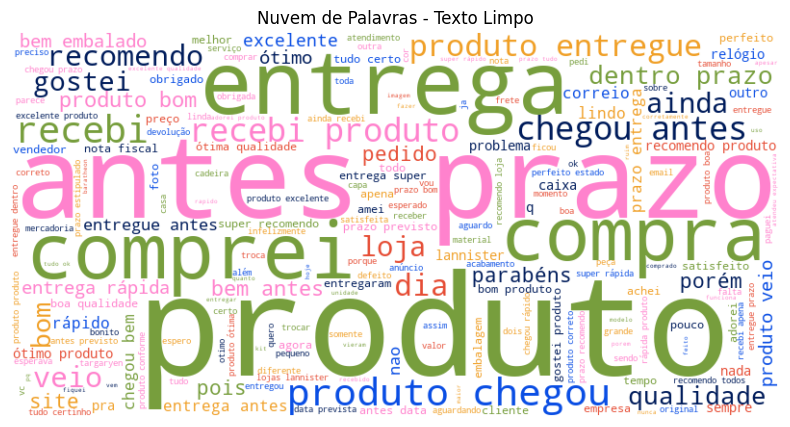

In [24]:
# Concatena todos os textos não nulos da coluna 'review_comment_message_clean' em uma única string
text_combined = " ".join(nlp_df['review_comment_message_clean'].dropna())

# Gera a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text_combined)

# Exibe a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Nuvem de Palavras - Texto Limpo")
plt.axis("off")  # Remove os eixos
plt.show()

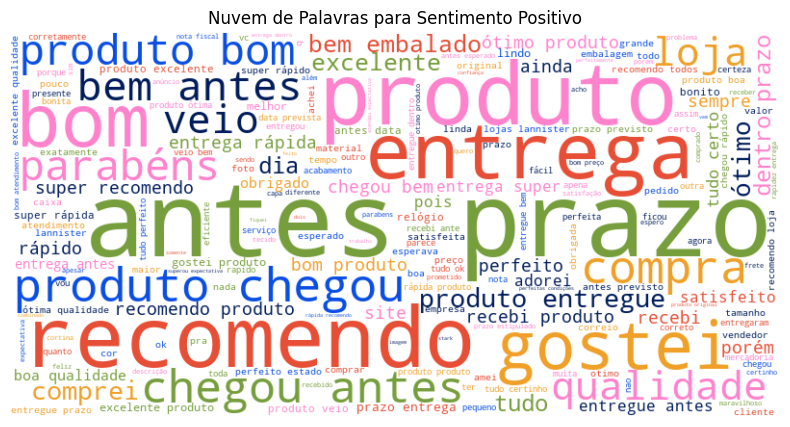

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filtra os dados para o sentimento 'Positivo'
text_data_positive = " ".join(nlp_df[nlp_df['review_comment_message_clean_sentiment'] == 'Positivo']['review_comment_message_clean'].dropna())

# Gera a nuvem de palavras para o sentimento Positivo
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text_data_positive)

# Cria a figura para o gráfico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')  # Desativa os eixos
plt.title('Nuvem de Palavras para Sentimento Positivo')

# Exibe o gráfico
plt.show()

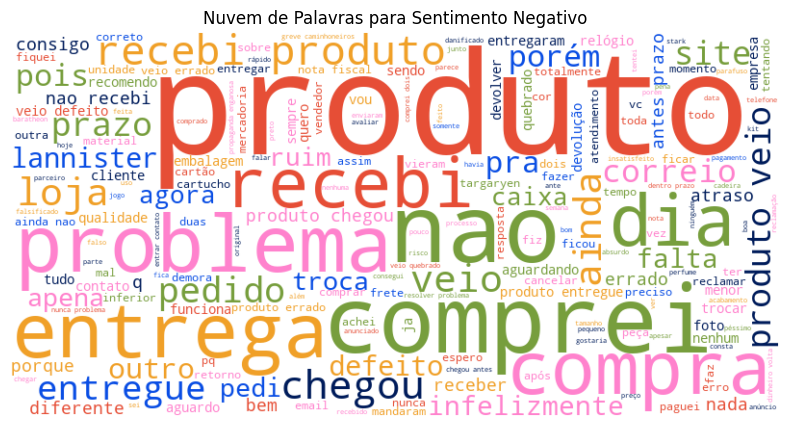

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filtra os dados para o sentimento 'Negativo'
text_data_negative = " ".join(nlp_df[nlp_df['review_comment_message_clean_sentiment'] == 'Negativo']['review_comment_message_clean'].dropna())

# Gera a nuvem de palavras para o sentimento Negativo
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text_data_negative)

# Cria a figura para o gráfico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')  # Desativa os eixos
plt.title('Nuvem de Palavras para Sentimento Negativo')

# Exibe o gráfico
plt.show()

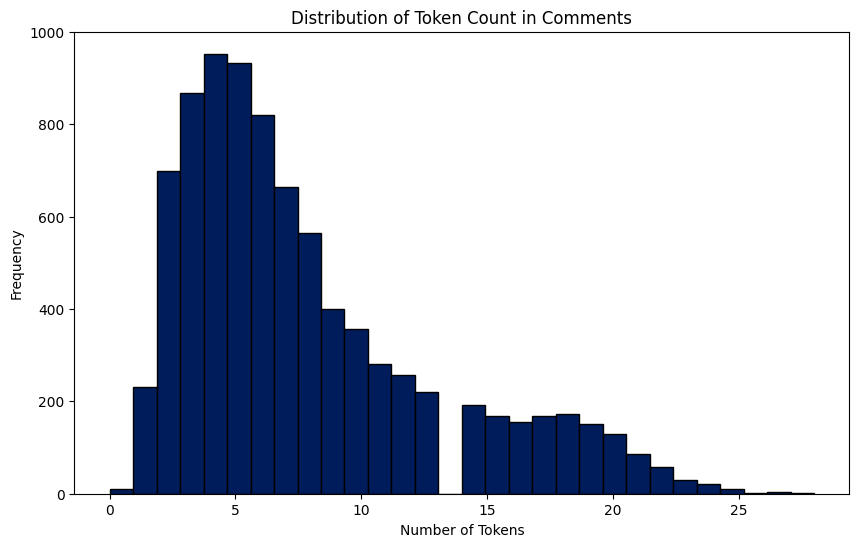

In [27]:
def plot_token_count_distribution(df, token_column='review_comment_message_tokens'):
    # Calculate the number of tokens for each entry
    df['token_count'] = df[token_column].apply(len)
    
    # Plot the distribution of token counts
    plt.figure(figsize=(10, 6))
    plt.hist(df['token_count'], bins=30, edgecolor='black')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.title('Distribution of Token Count in Comments')
    plt.show()
    
# Generate the token count distribution plot
plot_token_count_distribution(nlp_df, 'review_comment_message_tokens')

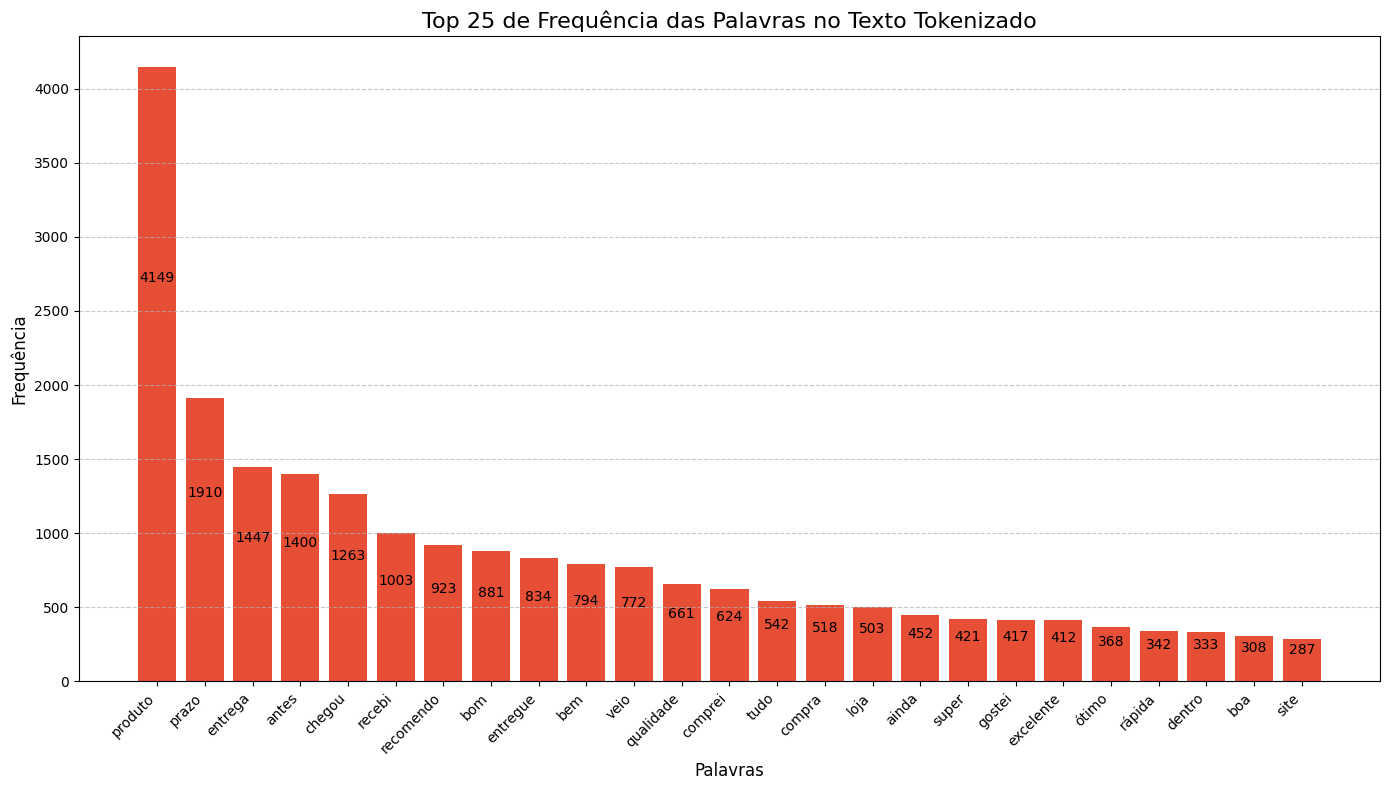

In [28]:
# Função para obter os N principais tokens ou n-gramas
def get_top_tokens(df, token_column='review_comment_message_tokens', top_n=50):
    all_tokens = [token for tokens in df[token_column] for token in tokens]
    token_counts = Counter(all_tokens)
    return token_counts.most_common(top_n)

# Função para criar um DataFrame a partir das contagens de frequência
def create_frequency_df(counter, columns=['Palavra', 'Frequência']):
    return pd.DataFrame(counter.items(), columns=columns)

# Função geral de plotagem para gráficos de barras
def plot_top_frequencies(df, title, xlabel, column_name):
    plt.figure(figsize=(14, 8))
    bars = plt.bar(df[column_name], df['Frequência'], color=colors[1])
    
    # Adiciona rótulos
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height() - max(5, bar.get_height() * 0.35), 
                 f'{int(bar.get_height())}', ha='center', color='black', fontsize=10)

    # Personaliza e exibe o gráfico
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Obter os principais tokens e plotar
top_50_tokens = get_top_tokens(nlp_df, 'review_comment_message_tokens', 50)
top_50_tokens_df = create_frequency_df(dict(top_50_tokens))
plot_top_frequencies(top_50_tokens_df.head(25), 'Top 25 de Frequência das Palavras no Texto Tokenizado', 'Palavras', 'Palavra')

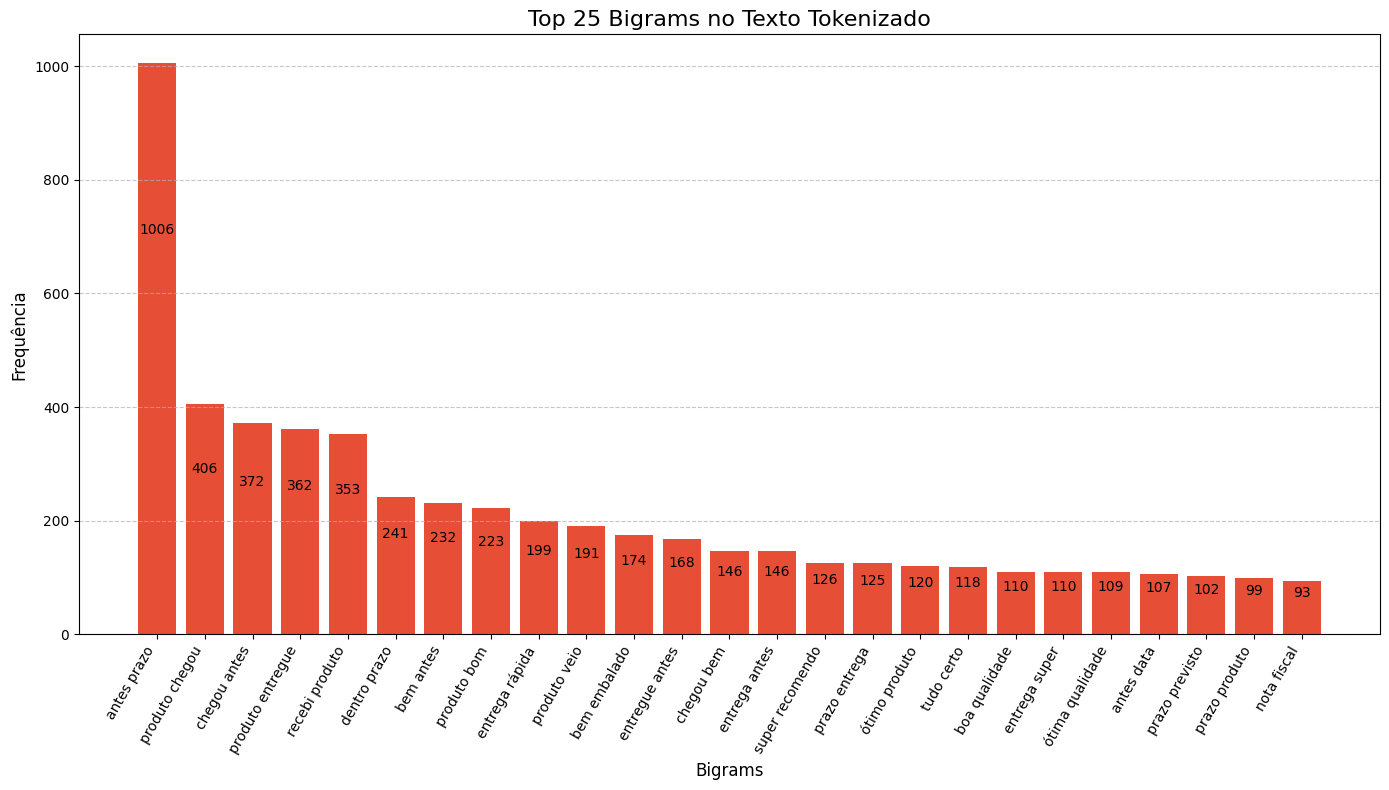

In [29]:
# Gerador de n-gramas e contador de frequência
def get_top_ngrams(tokens_list, n=2, top_n=25):
    ngram_counts = Counter(
        ngram for tokens in tokens_list if tokens for ngram in ngrams(tokens, n)
    )
    # Cria um DataFrame diretamente dos n-gramas mais comuns
    return pd.DataFrame(ngram_counts.most_common(top_n), columns=['Bigram', 'Frequência'])

# Gerar os 25 principais bigrams e plotar
top_bigrams_df = get_top_ngrams(nlp_df['review_comment_message_tokens'], n=2, top_n=25)

# Plotando
plt.figure(figsize=(14, 8))
bars = plt.bar(
    [f'{gram[0]} {gram[1]}' for gram in top_bigrams_df['Bigram']], 
    top_bigrams_df['Frequência'], color=colors[1])

# Adiciona rótulos de contagem acima das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height() - max(5, bar.get_height() * 0.3), 
             f'{int(bar.get_height())}', ha='center', color='black', fontsize=10)

# Personaliza o gráfico
plt.xlabel('Bigrams', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Top 25 Bigrams no Texto Tokenizado', fontsize=16)
plt.xticks(rotation=60, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

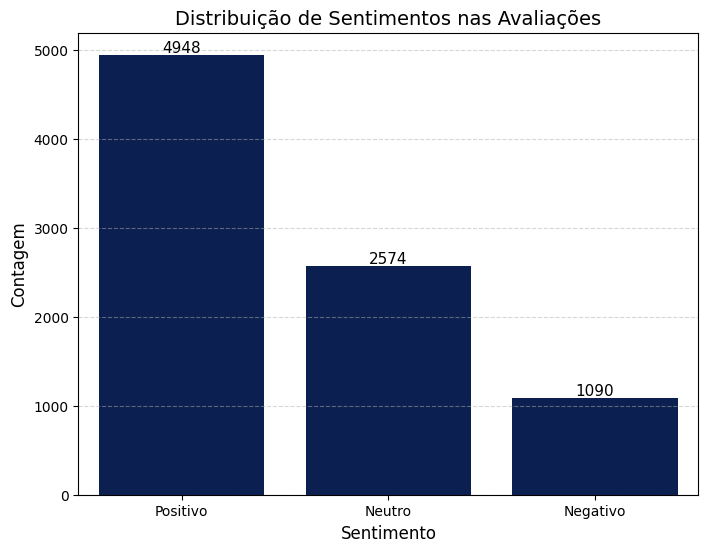

In [30]:
# Plotar a contagem de sentimentos
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="review_comment_message_clean_sentiment", data=nlp_df)

# Adicionar rótulos e título
plt.xlabel("Sentimento", fontsize=12)
plt.ylabel("Contagem", fontsize=12)
plt.title("Distribuição de Sentimentos nas Avaliações", fontsize=14)

# Exibir rótulos de valor no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Reduzir a visibilidade das linhas de grade para um visual mais limpo
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.5)

plt.savefig('C:/Users/Rubeus/Documents/tcc/images/sentimentos.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

## 4. Pré-processamento e Preparação de Dados para Análise de Sentimentos com TF-IDF

### 4.1 Separando Variáveis Independentes e Dependentes

In [31]:
X = nlp_df['review_comment_message'] 
y = nlp_df['review_comment_message_clean_sentiment'] 

### 4.2 Dividindo os Dados em Conjuntos de Treinamento e Teste

In [32]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.3 Codificação de Classes Categóricas com LabelEncoder

In [33]:
# Converter classes categóricas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  
y_test_encoded = label_encoder.transform(y_test)

# Verificar se a conversão foi bem-sucedida
print(f"Valores únicos em y_train_encoded após a codificação: {y_train_encoded}")

# Visualização
label_encoder

Valores únicos em y_train_encoded após a codificação: [2 1 2 ... 0 2 2]


LabelEncoder()

### 4.4 Vetorização do texto com TF-IDF

In [34]:
# Vetorizar o texto usando TF-IDF
vectorizer = TfidfVectorizer(max_features=5000) # Limite opcional para o número de características

# Transformar os textos em vetores TF-IDF
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Converter para arrays densos (se necessário para alguns modelos)
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Visualização
vectorizer
import joblib
joblib.dump(vectorizer, 'vectorizer.pkl')  # Salva o vetorizer

['vectorizer.pkl']

## 5. Machine Learning

### 5.1 Treinamento do Modelo 

In [35]:
# Inicializar os modelos
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=50, max_iter=1000),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(kernel='linear', random_state=42, probability=True)
}

# Treinar os modelos e calcular as pontuações de acurácia
results = []
for name, model in models.items():
    model.fit(X_train_dense, y_train_encoded)
    train_accuracy = accuracy_score(y_train_encoded, model.predict(X_train_dense))
    test_accuracy = accuracy_score(y_test_encoded, model.predict(X_test_dense))
    results.append({"Modelo": name, "Acurácia de Treinamento": train_accuracy, "Acurácia de Teste": test_accuracy})
    
pd.DataFrame(results)

,Modelo,Acurácia de Treinamento,Acurácia de Teste
0,DecisionTreeClassifier,1.000,0.815
1,RandomForestClassifier,1.000,0.857
2,LogisticRegression,0.935,0.883
3,KNeighborsClassifier,0.555,0.519
4,GradientBoostingClassifier,0.879,0.860
5,SVC,0.959,0.904


### 5.2 Avaliação da Importância das Features

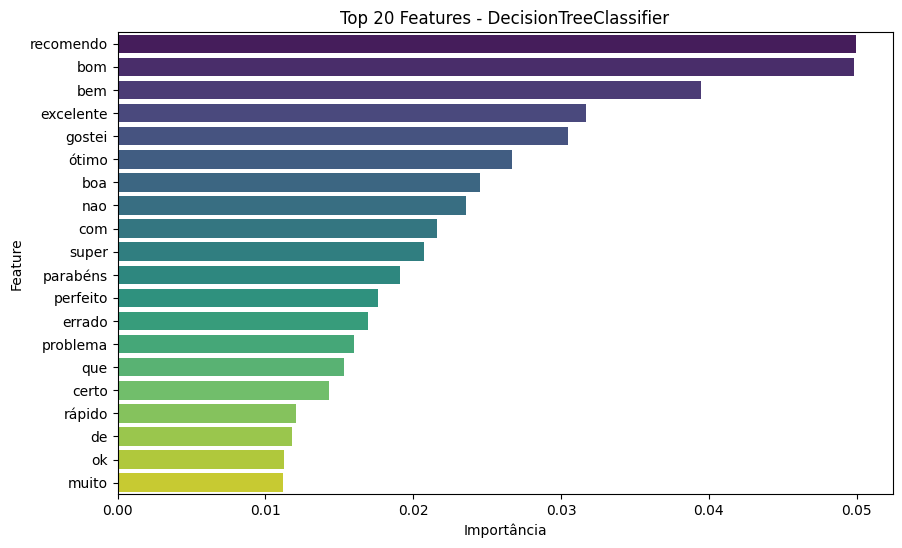

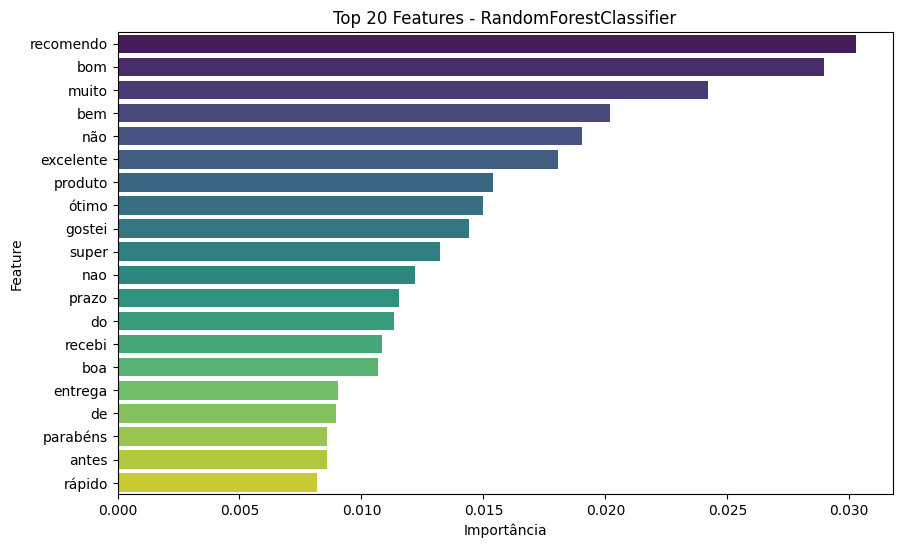

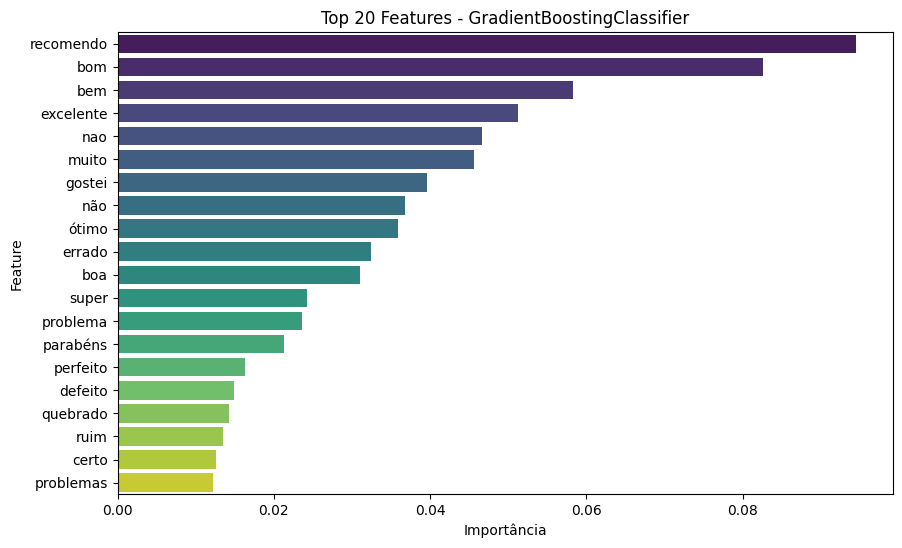

In [36]:
feature_importances = []
feature_names = vectorizer.get_feature_names_out()

for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        imp_df = pd.DataFrame({"Feature": feature_names, "Importância": importances}).sort_values(by="Importância", ascending=False).head(20)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x="Importância", y="Feature", data=imp_df, palette="viridis")  # Usando uma paleta predefinida
        plt.title(f"Top 20 Features - {name}")
        plt.show()

### 5.3 Matriz de Confusão

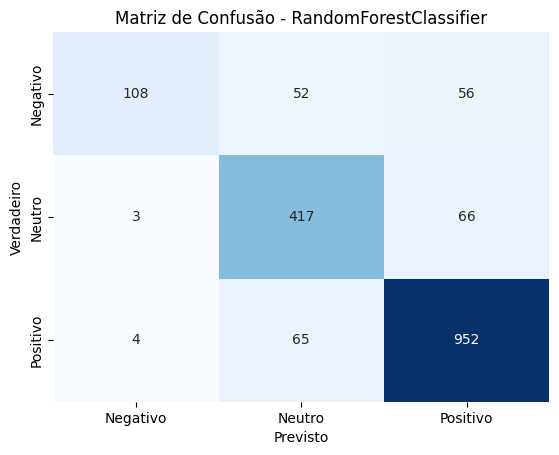

In [37]:
# Matriz de Confusão para RandomForestClassifier
y_pred_rf = models["RandomForestClassifier"].predict(X_test_dense)
cm_rf = confusion_matrix(y_test_encoded, y_pred_rf)
plt.figure()
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Previsto")  
plt.ylabel("Verdadeiro")  
plt.title("Matriz de Confusão - RandomForestClassifier")  

plt.savefig('C:/Users/Rubeus/Documents/tcc/images/matriz_randomforest.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

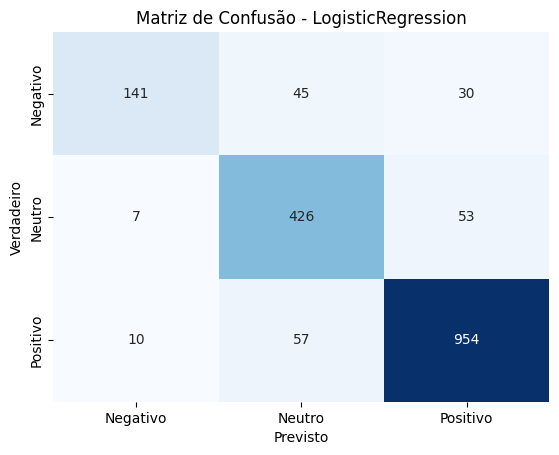

In [38]:
# Matriz de Confusão para LogisticRegression
y_pred_lr = models["LogisticRegression"].predict(X_test_dense)
cm_lr = confusion_matrix(y_test_encoded, y_pred_lr)
plt.figure()
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Previsto")  
plt.ylabel("Verdadeiro")  
plt.title("Matriz de Confusão - LogisticRegression")  

plt.savefig('C:/Users/Rubeus/Documents/tcc/images/matriz_logisticregression.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

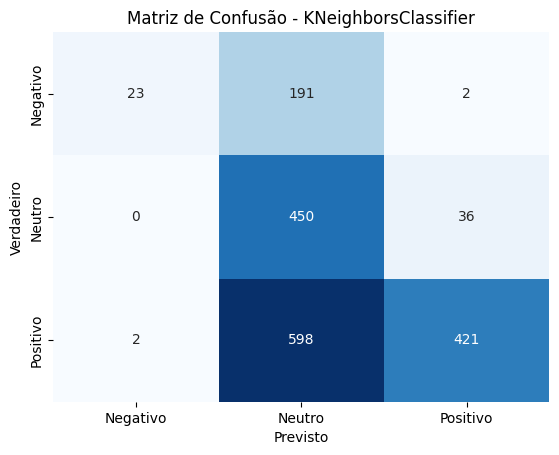

In [39]:
# Matriz de Confusão para KNeighborsClassifier
y_pred_knn = models["KNeighborsClassifier"].predict(X_test_dense)
cm_knn = confusion_matrix(y_test_encoded, y_pred_knn)
plt.figure()
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Previsto")  
plt.ylabel("Verdadeiro")  
plt.title("Matriz de Confusão - KNeighborsClassifier")  

plt.savefig('C:/Users/Rubeus/Documents/tcc/images/matriz_kneighbors.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

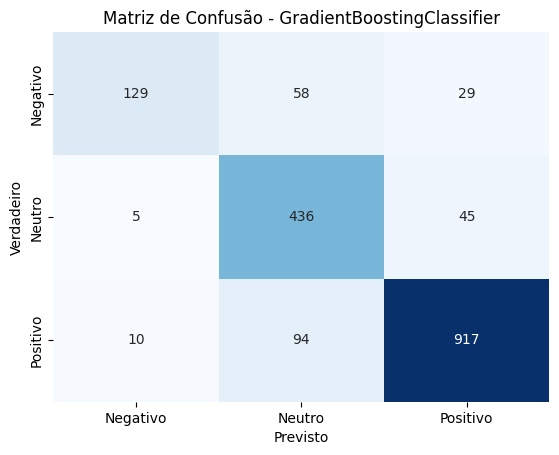

In [40]:
# Matriz de Confusão para GradientBoostingClassifier
y_pred_gb = models["GradientBoostingClassifier"].predict(X_test_dense)
cm_gb = confusion_matrix(y_test_encoded, y_pred_gb)
plt.figure()
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Previsto")  
plt.ylabel("Verdadeiro")  
plt.title("Matriz de Confusão - GradientBoostingClassifier")  

plt.savefig('C:/Users/Rubeus/Documents/tcc/images/matriz_GDBT.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

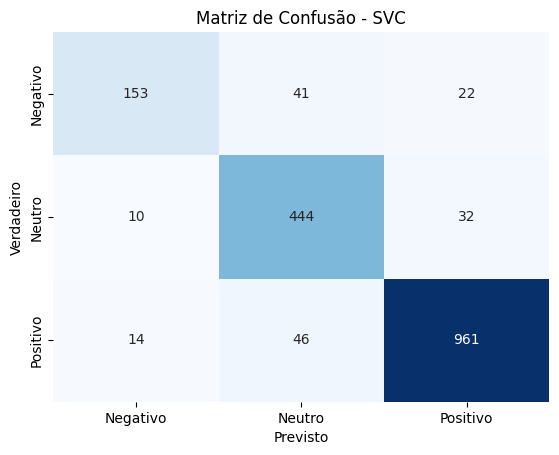

In [41]:
# Matriz de Confusão para SVC
y_pred_svc = models["SVC"].predict(X_test_dense)
cm_svc = confusion_matrix(y_test_encoded, y_pred_svc)
plt.figure()
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Previsto")  
plt.ylabel("Verdadeiro")  
plt.title("Matriz de Confusão - SVC")  

plt.savefig('C:/Users/Rubeus/Documents/tcc/images/matriz_SVC.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

### 5.4 Curva ROC

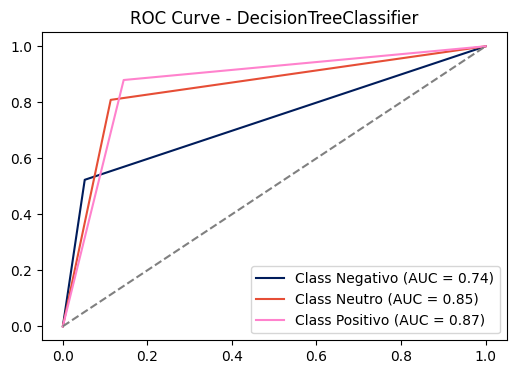

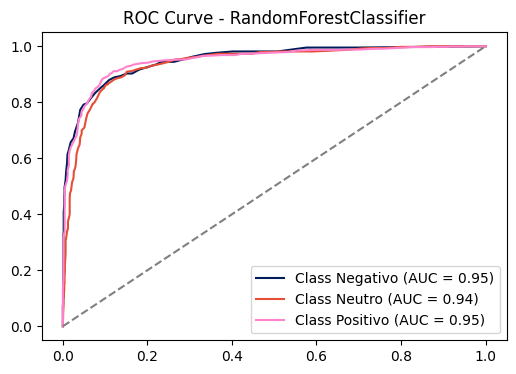

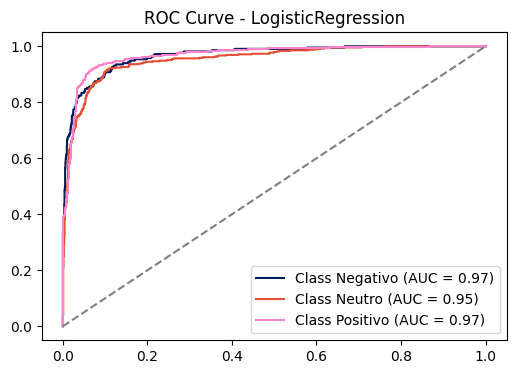

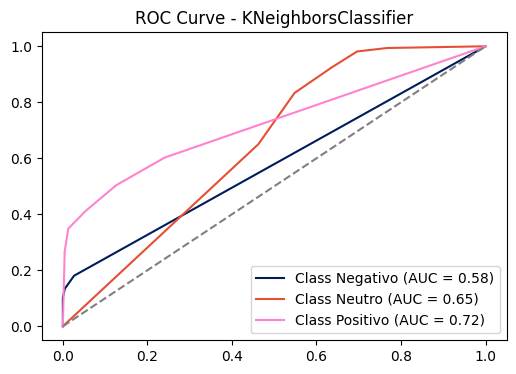

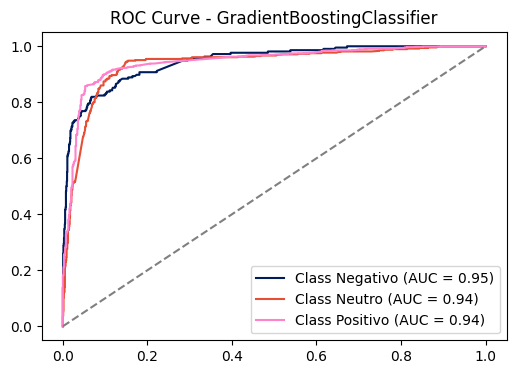

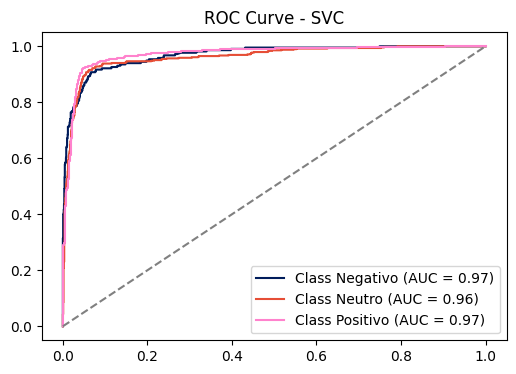

In [42]:
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
n_classes = y_test_binarized.shape[1]

for name, model in models.items():
    plt.figure(figsize=(6, 4))
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_dense)
    else:
        y_decision = model.decision_function(X_test_dense)
        y_prob = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())
    
    for class_id in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, class_id], y_prob[:, class_id])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {label_encoder.inverse_transform([class_id])[0]} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()

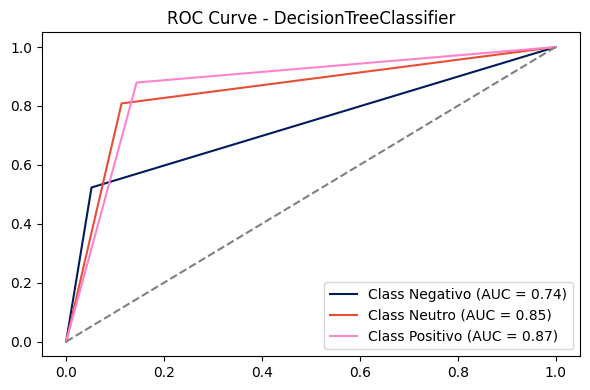

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Curvas ROC para DecisionTreeClassifier
plt.figure(figsize=(6, 4))
model = models["DecisionTreeClassifier"]
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test_dense)
else:
    y_decision = model.decision_function(X_test_dense)
    y_prob = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())

# Gerar as curvas ROC para cada classe
for class_id in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, class_id], y_prob[:, class_id])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {label_encoder.inverse_transform([class_id])[0]} (AUC = {roc_auc:.2f})")

# Linha diagonal (chance)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Adicionar título e legenda
plt.title("ROC Curve - DecisionTreeClassifier")
plt.legend()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

plt.savefig('C:/Users/Rubeus/Documents/tcc/images/curva_DT.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

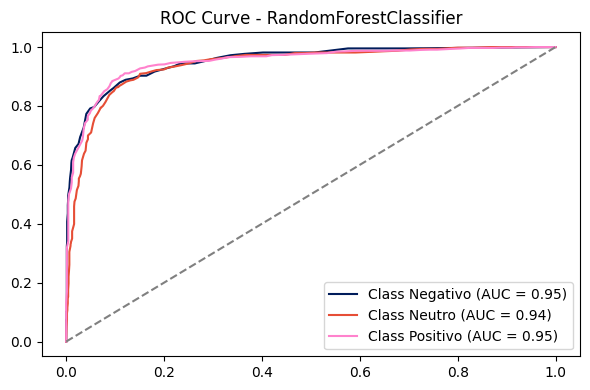

In [44]:
# Curvas ROC para RandomForestClassifier
plt.figure(figsize=(6, 4))
model = models["RandomForestClassifier"]

# Verifica se o modelo tem o método 'predict_proba' ou 'decision_function'
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test_dense)
else:
    y_decision = model.decision_function(X_test_dense)
    y_prob = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())

# Gerar as curvas ROC para cada classe
for class_id in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, class_id], y_prob[:, class_id])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {label_encoder.inverse_transform([class_id])[0]} (AUC = {roc_auc:.2f})")

# Linha diagonal (chance)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Adicionar título e legenda
plt.title("ROC Curve - RandomForestClassifier")
plt.legend()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

plt.savefig('C:/Users/Rubeus/Documents/tcc/images/curva_RF.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

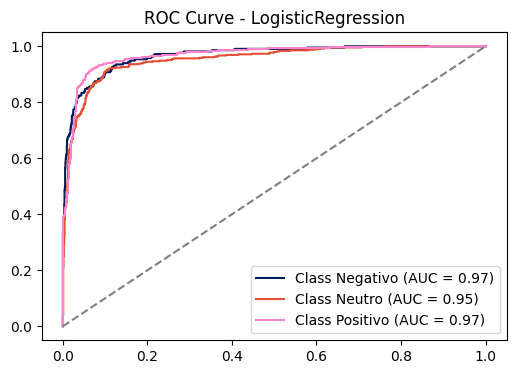

In [45]:
# Curvas ROC para LogisticRegression
plt.figure(figsize=(6, 4))
model = models["LogisticRegression"]
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test_dense)
else:
    y_decision = model.decision_function(X_test_dense)
    y_prob = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())

for class_id in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, class_id], y_prob[:, class_id])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {label_encoder.inverse_transform([class_id])[0]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve - LogisticRegression")
plt.legend()
plt.savefig('C:/Users/Rubeus/Documents/tcc/images/curva_LR.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

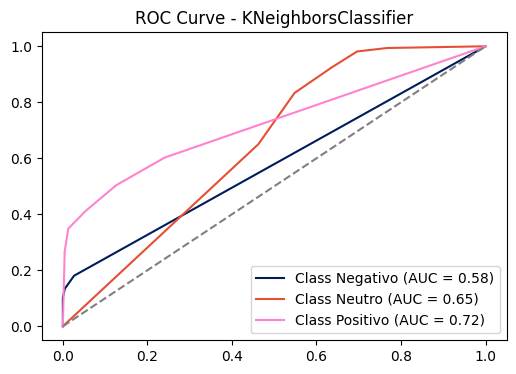

In [46]:
# Curvas ROC para KNeighborsClassifier
plt.figure(figsize=(6, 4))
model = models["KNeighborsClassifier"]
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test_dense)
else:
    y_decision = model.decision_function(X_test_dense)
    y_prob = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())

for class_id in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, class_id], y_prob[:, class_id])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {label_encoder.inverse_transform([class_id])[0]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve - KNeighborsClassifier")
plt.legend()

plt.savefig('C:/Users/Rubeus/Documents/tcc/images/curva_KN.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

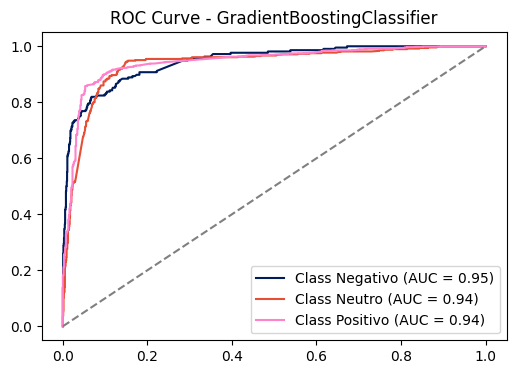

In [47]:
# Curvas ROC para GradientBoostingClassifier
plt.figure(figsize=(6, 4))
model = models["GradientBoostingClassifier"]
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test_dense)
else:
    y_decision = model.decision_function(X_test_dense)
    y_prob = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())

for class_id in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, class_id], y_prob[:, class_id])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {label_encoder.inverse_transform([class_id])[0]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve - GradientBoostingClassifier")
plt.legend()
plt.savefig('C:/Users/Rubeus/Documents/tcc/images/curva_GDBT.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

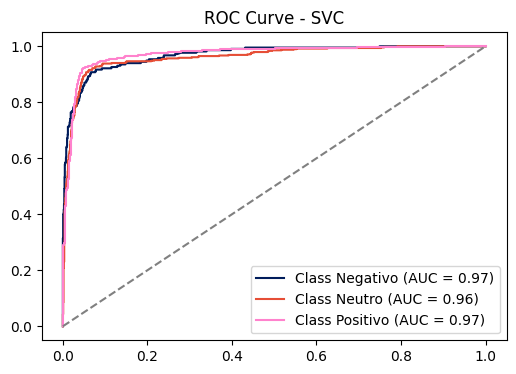

In [48]:
# Curvas ROC para SVC
plt.figure(figsize=(6, 4))
model = models["SVC"]
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test_dense)
else:
    y_decision = model.decision_function(X_test_dense)
    y_prob = (y_decision - y_decision.min()) / (y_decision.max() - y_decision.min())

for class_id in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, class_id], y_prob[:, class_id])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {label_encoder.inverse_transform([class_id])[0]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve - SVC")
plt.legend()

plt.savefig('C:/Users/Rubeus/Documents/tcc/images/curva_SVC.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

### 5.5 Reporte de Classificação

In [49]:
for name, model in models.items():
    y_pred = model.predict(X_test_dense)
    print(f"Classification Report for {name}")
    print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

Classification Report for DecisionTreeClassifier
              precision    recall  f1-score   support

    Negativo       0.59      0.52      0.56       216
      Neutro       0.74      0.81      0.77       486
    Positivo       0.90      0.88      0.89      1021

    accuracy                           0.81      1723
   macro avg       0.74      0.74      0.74      1723
weighted avg       0.81      0.81      0.81      1723

Classification Report for RandomForestClassifier
              precision    recall  f1-score   support

    Negativo       0.94      0.50      0.65       216
      Neutro       0.78      0.86      0.82       486
    Positivo       0.89      0.93      0.91      1021

    accuracy                           0.86      1723
   macro avg       0.87      0.76      0.79      1723
weighted avg       0.86      0.86      0.85      1723

Classification Report for LogisticRegression
              precision    recall  f1-score   support

    Negativo       0.89      0.65      0

### 5.6 Coleta e Análise de Dados de Desempenho

In [50]:
# Collect performance metrics
performance_data = []
for name, model in models.items():
    y_pred = model.predict(X_test_dense)
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test_encoded, y_pred),
        "Precision": precision_score(y_test_encoded, y_pred, average='weighted'),
        "Recall": recall_score(y_test_encoded, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test_encoded, y_pred, average='weighted')
    }
    performance_data.append(metrics)

# Convert list of dictionaries to DataFrame
performance_df = pd.DataFrame(performance_data)

# Apply highlight to numeric columns only
highlighted_df = (
    performance_df.style
    .highlight_max(
        subset=performance_df.select_dtypes(include='number').columns,  # Only numeric columns
        color="lightblue", 
        axis=0
    )
)

# Display the styled DataFrame
highlighted_df

,Model,Accuracy,Precision,Recall,F1-Score
0,DecisionTreeClassifier,0.814858,0.814806,0.814858,0.814042
1,RandomForestClassifier,0.857226,0.863256,0.857226,0.850985
2,LogisticRegression,0.882763,0.884593,0.882763,0.880908
3,KNeighborsClassifier,0.518862,0.761292,0.518862,0.508218
4,GradientBoostingClassifier,0.860128,0.869778,0.860128,0.859005
5,SVC,0.904237,0.905261,0.904237,0.903290


In [51]:
import joblib

joblib.dump(models["SVC"], 'svc_model.pkl')

['svc_model.pkl']